In [74]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d, CubicHermiteSpline
import sympy as sp
sp.init_printing()
import pandas as pd
import urllib.request
from sympy import expand, symbols,pi,pretty

# Actividad 05: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Benjamin Escobar Jaramillo
*Métodos computacionales 2025-I*

---

# 1
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}

Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.

- Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

*Nota: recuerde que los indices en python inician en 0, luego si tenemos $n+1$ datos el polinomio es de orden $n$*

In [ ]:
# De acuerdo, comencemos entonces con nuestros puntos proporcionados!
x = sp.symbols('x') #Para trabajar proximamente!

xp=np.array([0,np.pi/2,np.pi])
yp=np.array([0,1,0])

xin=np.linspace(min(xp),max(xp)) #Nuestra interpolación

polagrange= lagrange(xp, yp)  #Perfecto! Ya tenemos nuestros coeficientes! Ahora visualicemos nuestro polinomio.
p=0
for i in range(0,len(xp)): #Hacemos len xp, pues tendrá tantos coeficientes como puntos, pero algun coeficiente puede ser 0
                            # Por lo tal, no lo detectaría si pusieramos len(polagrange)
  p=p+(x**(i))*(polagrange[i])   #Y esto lo hacemos, para visualizarlo de manera simbólica

p            #Y voilà! Acà tenemos el polinomio de Lagrange! Observemoslo

                     2                     
- 0.405284734569351⋅x  + 1.27323954473516⋅x

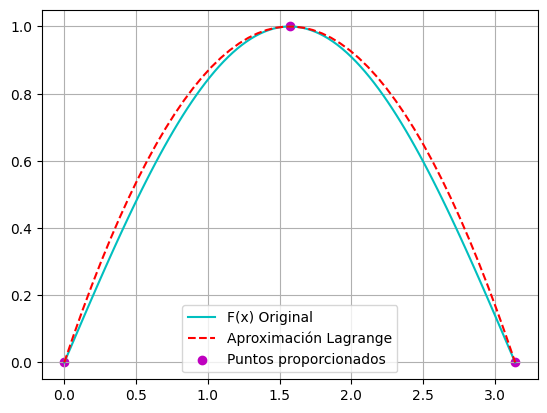

In [ ]:
# Ahora, vamos a gráficar y comparar.
x00=np.linspace(0,np.pi,100)
y00=np.sin(x00)
plt.plot(x00,y00,label="F(x) Original",color="c")
plt.plot(xin,polagrange(xin),color="r",label='Aproximación Lagrange',linestyle='--')
plt.scatter(xp,yp,color="m",label='Puntos proporcionados')
plt.legend()
plt.grid() #Si que se acerca bastante, aunque no es precisamente el mismo

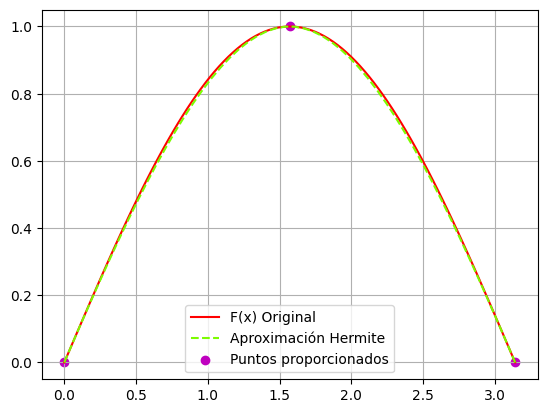

In [ ]:
#Muy bien! Ahora sigue Hermite!
xp=np.array([0,np.pi/2,np.pi])
yp=np.array([0,1,0])
df=np.cos(xp)                 #Necesitamos la derivada para hacer hermite!
xin=np.linspace(min(xp),max(xp)) #Nuestra interpolación

polhermite=CubicHermiteSpline(xp,yp,df)
#Y ahora, volvemos a comparar

plt.plot(x00,y00,label="F(x) Original",color="r")
plt.plot(xin,polhermite(xin),color="lawngreen",label='Aproximación Hermite',linestyle='--')
plt.scatter(xp,yp,color="m",label='Puntos proporcionados')
plt.legend()
plt.grid() #Wow! Este señor sí que es preciso! es en la practica, el mismo! y note que solo tenemos 3 puntos!

In [ ]:
'''
Como acabamos de ver, la interpolación por Hermite, resultó ser mas precisa que la de Lagrange, por lo cual,
esperamos que eso se vea reflejado en el error! Veamos entonces.
'''
#a)Error Lagrange

#A continuación requerimos muchas derivadas, por lo cual, empleemos nuestros cálculos simbolicos
#Tenemos 3 datos! xp=np.array([0,np.pi/2,np.pi]), es decir, x0,x1,x2. Por lo cual necesitamos la tercera derivada! (n+1)

xp=np.array([0,np.pi/2,np.pi])   #Nuestros datos
xin=np.linspace(min(xp),max(xp),100) #Nuestra interpolación
n=(len(xp)-1) #Como len cuenta desde 1, para mantener la notación, le restamos 1 (como si contara desde 0)
f=sp.sin(x)
f3= sp.diff(f, x, n+1)# Acà tenemos nuestra tercera derivada! (pues len si cuenta exactamente el numero de datos, no desde 0)

#Definamos neustra función de error
ErrLagrange= (1/sp.factorial(n+1))*(f3)*(x-xp[0])*(x-xp[1])*(x-xp[2])
ErrLagrange  #Y como podemos ver! aqui esta nuestro error de lagrange!

-x⋅(x - 3.14159265358979)⋅(x - 1.5707963267949)⋅cos(x) 
───────────────────────────────────────────────────────
                           6                           

In [ ]:
#Continuemos entonces con nuestro error de Hermite (parece un poco mas complejo, huh?)
xp=np.array([0,np.pi/2,np.pi])
xin=np.linspace(min(xp),max(xp),100) #Solo las vuelvo a poner en las iteraciones para tenerlas encuenta. Recordemoslas!!!!
n=(len(xp)-1)
f=sp.sin(x)

df=sp.diff(f,x,((2*n)+2))  #Definimos la derivada solicitada!
#Ahora, hagamos la productoria.
prod=1
for i in range(0,n+1):
  prod*=((x-(xp[i]))**2)
#Y ahora completemos la función.

ErrHermite= (df/(sp.factorial(2*n+2)))*(prod)
ErrHermite #Y voilá! Aca tenemos nuestra función simbolica del error!

                     2                          2                          2   ↪
-0.0338226010534731⋅x ⋅(0.318309886183791⋅x - 1) ⋅(0.636619772367581⋅x - 1) ⋅s ↪

↪      
↪ in(x)

'\nJusto como sospechabamos; El error de Hermite es casi nulo, mientras que lagrange, presenta sus pequeños errores.\nDe igual manera, todo parece estar funcionando, pues la única garantía verdadera es que las funciones polinòmicas asociadas\nSIEMPRE PASAN POR LOS PUNTOS, y como podemos observar, cuando estamos en el punto, el error en ambas es 0.\n'

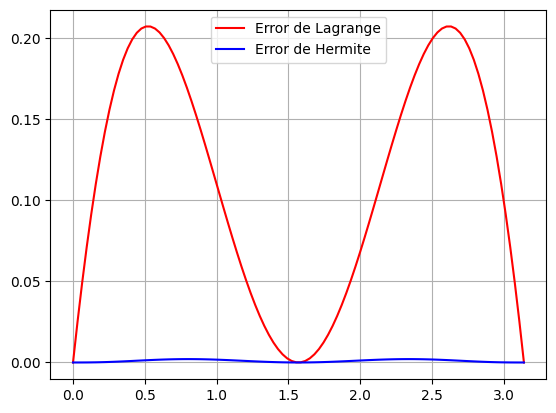

In [ ]:
''' Por lo cual, solo queda lambdificar y gráficar!!!'''
FerrLagrange= sp.lambdify(x, ErrLagrange)
FerrHermite= sp.lambdify(x,ErrHermite)

yL=FerrLagrange(xin)
yH=FerrHermite(xin)


plt.plot(xin,abs(yL),color="r",label="Error de Lagrange") #Como la derivada puede ser negativa, empleemos valor absoluto al gràficar.
plt.plot(xin,abs(yH),color="b",label="Error de Hermite")
plt.grid()
plt.legend()
'''
Justo como sospechabamos; El error de Hermite es casi nulo, mientras que lagrange, presenta sus pequeños errores.
De igual manera, todo parece estar funcionando, pues la única garantía verdadera es que las funciones polinòmicas asociadas
SIEMPRE PASAN POR LOS PUNTOS, y como podemos observar, cuando estamos en el punto, el error en ambas es 0.
'''

# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función original.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el máximo   error asociado a cada uno de ellos. ¿Cuál será el mejor?

      σ₀      
──────────────
 2            
G            2
── + (E - Er) 
4             


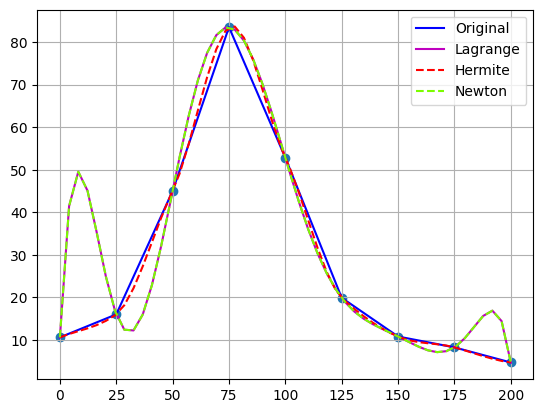

In [ ]:
#Comencemos entonces.
#a) Calcular los Sigma subzero.
E= np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
Er=78.55
G=78.55
sigma0 = (sigma)*( ((E - Er)**2) + ((G**2)/(4)) ) #Perfecto! Ya tenemos todos los datos que necesitamos! Teoricamente.

xinter=np.linspace(min(E),max(E))

#b) Hagmos la función Simbólica
e = sp.symbols('E')
s=sp.symbols('σ')
s0=sp.symbols('σ0')
er=sp.symbols('Er')
g=sp.symbols('G')

se= s0/ ((e-er)**2 + g**2 / 4)
sp.pprint(se)                             #Perfecto! Ahora... derivamos? Con respecto a E? (Para hermite)...

Dse=sp.diff(se,e)
dfDse= sp.lambdify((e,er,s0,g),Dse)          #lambdificamos....!
dydx_sigma=dfDse(E,Er,sigma0,G)              #Y ahora tenemos una lista mas con nuevos puntos!!

''' Reorganicemonos para entender mejor'''
E                      #Puntos E
sigma                  #Puntos Y
xinter                 #Puntos interpolados
dydx_sigma             #Puntos de la derivada

'''Muy bien, prosigamos entonces con la interpolación!'''
pLagrange=lagrange(E,sigma)
pHermite=CubicHermiteSpline(E,sigma,dydx_sigma)

#Opps! No tenemos Newton. Debemos implementarlo.

#a) Las mencionadas diferencias divididas
def diferencias_divididas(x,y,i,j):
  if i==j:
    return y[i]
  else:
    num=diferencias_divididas(x,y,i+1,j)-diferencias_divididas(x,y,i,j-1)
    den=x[j]-x[i]
    return num/den

#b) Filtremos la primera fila de las diferencias divididas!!
def coeficientes(x,y):
  coef=np.zeros_like(x,dtype=float)
  for j in range(len(x)):
    coef[j]=diferencias_divididas(x,y,0,j)
  return coef

#c) Ya tenemos todo para hacer newton!!
def newt(x,y,x_interp):
  a=coeficientes(x,y)
  P= a[0]
  prod=1
  for i in range(1,len(x)):       #Empieza en 1, pues ya tenemos a[0]
    prod*=(x_interp-x[i-1])
    P+=a[i] * prod

  return P

#Finalmente entonces la tenemos, por lo cual...

Newton=newt(E,sigma,xinter)

#Ahora, solo queda hacer la función Original!!!
fE=sp.lambdify(((e,er,s0,g)),se) #Voilà (Ya la teniamos simbólica, que trucazo, no?)

plt.plot(E,fE(E,Er,sigma0,G),color="b",label="Original")
plt.plot(xinter,pLagrange(xinter),color="m",label="Lagrange")
plt.plot(xinter,pHermite(xinter),color="r",label="Hermite",linestyle="--")
plt.plot(xinter,Newton,color="lawngreen",linestyle="--",label="Newton")
plt.grid()
plt.legend()
plt.scatter(E,sigma)

In [ ]:
'''
WOW!!! Damas y caballeros, pero que espectáculo! Que programación tan meticulosa y colosal!!! Comencemos a concluir;
Primero, no tenemos nada mas y nada menos que puntos en la función original, por lo cual está mas bien... lineal.
Pero note, como la maravilla del polinomio Hermite, nos da una aproximación bastante precisa de la función!
Nos atrevemos a decir que es en verdad MUY MUY precisa, y que la función original ha de comportarse asi.
También notamos extrañas fluctuaciones en lagrange y Newton. Como bien sabemos, con muchos puntos no son tan eficientes, sin embargo;
¿No es acaso muy curioso que se comporten exactamente igual? sus errores han de ser MUY similares, mientras que el error de Hermite,
debe tender a 0.
Confirmamos nuevamente que nuestros procesos fueron bien realizados, pues una vez más, cada aproximación pasa
EXACTAMENTE por los puntos proporcionados.
'''

"\nEureka! Igual al procedimiento antes realizado, sin embargo, note ahora lo muy limpia y 'continua' que es nuestra función!\nPerfecto; Calculemos entonces el error asociado a cada uno\n"

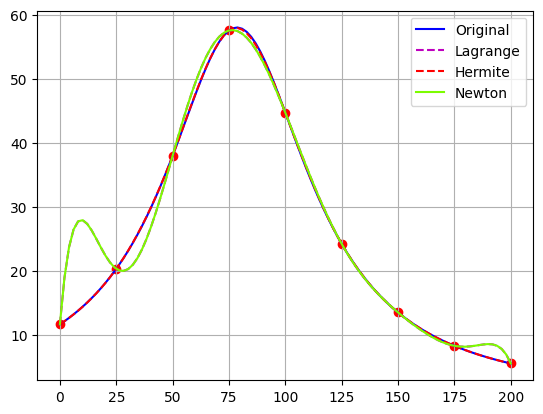

In [ ]:
''' Ahora bien, para calcular el error, necesitamos que nuestra función sea continua! Por lo cual... no empleemos un sigma0 variable,
sino que, netamente vamos a tomar la media de los valores que teniamos anteriormente, y lo dejamos fijo! de ese modo, podremos calcular
el error
'''

###Realizaremos todo como se vio anteriormente, pero con el cambio mencionado.

sigma00=np.mean(sigma0) #Aca obtenemos nuestra media
Er=78.55
G=78.55            #Recordamos nuestras constantes

#Y procedemos a editar todo, confirmando finalmente con la gráfica


#a) Creamos la funcion!!
def f_sigma(E):
  '''
  Recibe la energía, y proporciona la eficacia de disperción.
  -E: Energia (float)
  '''
  return sigma00/ ((E-Er)**2 + G**2 / 4)

#b) Obtengamos las listas que necesitamos! (es decir, los puntos a interpolar)
E= np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200]) #Puntos x
Ey= f_sigma(E)                                                     #Puntos y
puntos_deriavda=dfDse(E,Er,sigma00,G)                              #Puntos dydx
E_Interpol=np.linspace(min(E),max(E),100)                          #Puntos de interpolación

sigmalagrange=lagrange(E,Ey)
sigmaHermite=CubicHermiteSpline(E,Ey,puntos_deriavda)
sigmaNewton=newt(E,Ey,E_Interpol)

plt.plot(E_Interpol,f_sigma(E_Interpol),label='Original',color='b')
plt.plot(E_Interpol,sigmalagrange(E_Interpol),label='Lagrange',linestyle="--",color='m')
plt.plot(E_Interpol,sigmaHermite(E_Interpol),label='Hermite',linestyle="--",color='r')
plt.plot(E_Interpol,sigmaNewton,label='Newton',color="lawngreen")
plt.scatter(E,f_sigma(E),color="r")
plt.grid()
plt.legend()

'''
Eureka! Igual al procedimiento antes realizado, sin embargo, note ahora lo muy limpia y 'continua' que es nuestra función!
Perfecto; Calculemos entonces el error asociado a cada uno
'''

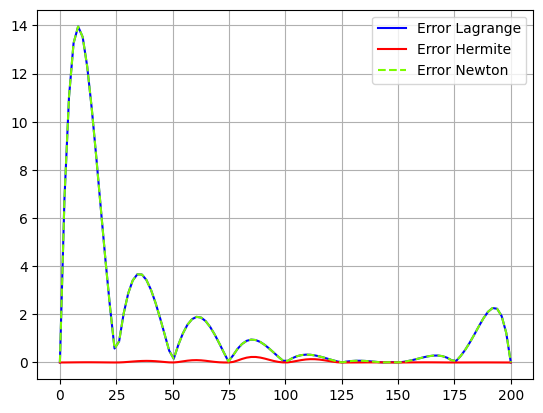

In [ ]:
ErrorLagrange=abs(sigmalagrange(E_Interpol)-f_sigma(E_Interpol))
ErrorHermite=abs(sigmaHermite(E_Interpol)-f_sigma(E_Interpol))         #Nuestra definicion de rrror... y osbervamos!
ErrorNewton=abs(sigmaNewton-f_sigma(E_Interpol))

#e0=np.zeros_like(E)

plt.plot(E_Interpol,ErrorLagrange,color='b',label='Error Lagrange')
plt.plot(E_Interpol,ErrorHermite,color='r',label='Error Hermite')
plt.plot(E_Interpol,ErrorNewton,color='lawngreen',linestyle='--',label='Error Newton')
#plt.scatter(E,e0,color="orange")
plt.grid()
plt.legend()

In [ ]:
''' Tal como nuestras sospechas con la grafica original lo indicaban, nuestra mejor opción de precisión fue Hermite!
Y de igual (y muy curiosa) manera, el error de Newton y lagrange son practicamente identicos (Y muy grandes!!)'''


# 3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

* Usando los datos del numeral anterior ahora usando el método `CubicSpline` realiza la interpolación y concluya.

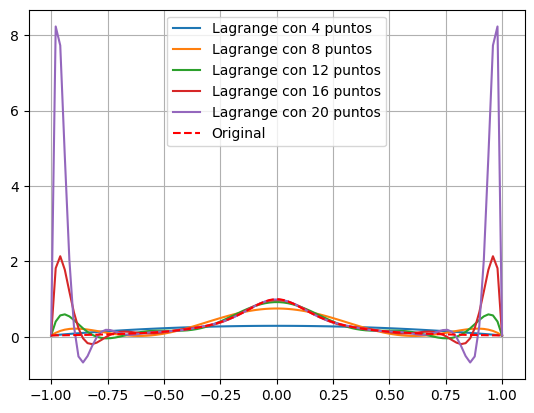

In [82]:
#Bien! Muchos detallitos que realizar, asi que, vamos por pasos!
#a) La función.
f=lambda x: 1/(1+25*(x**2))
n=[4,8,12,16,20] #este serà nuestro nùmero n de puntos.
xinter=np.linspace(-1,1,100) #Y aca vamos a interpolar.

puntos =lambda n:np.linspace(-1,1,n) #Y aca tenemos una función para puntos!!
puntos(n[0]) #Y la vamos a emplear así.

'''Ahora, con un practico loop, realizaremos todas nuestras gràficas automatizadas! '''

for i in n:
  p=puntos(i)  #Aca obtenemos los puntos
  polilag=lagrange(p,f(p)) #Hacemos un lagrange con los x & y
  plt.plot(xinter,polilag(xinter),label=f"Lagrange con {i} puntos")
plt.plot(xinter,f(xinter),color="r",label="Original",linestyle="--")
plt.legend()
plt.grid()

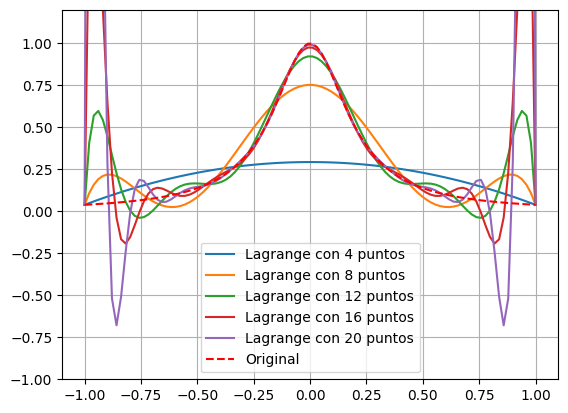

In [83]:
'''
¡Rayos! Vaya que la función comienza a oscilar y ponerse muy caótica al aumentarle los puntos!
Aceremos un poco la resolución; Observemos un poquito mejor que esta pasando.
'''
for i in n:
  p=puntos(i)
  polilag=lagrange(p,f(p)) #TODO Igual, solo hay un pequeño detalle aqui abajito....
  plt.plot(xinter,polilag(xinter),label=f"Lagrange con {i} puntos")
plt.plot(xinter,f(xinter),color="r",label="Original",linestyle="--")
plt.legend()
plt.ylim(-1,1.2)   #Voilà! aca esta nuestro "zoom"
plt.grid()

' Si que es muy terriblemente caótica!'

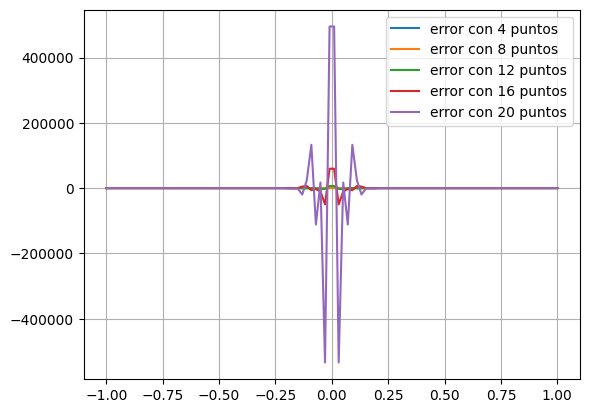

In [84]:
'''¡WOW! Quien diría que tanto caos podría ser tan bello visualmente...'''

#Bien! ya vimos un poco de entropía, vamos ahora confirmar que el error, crece con n! (Empleando... SymPy!!!)
#Recordemos...

n=[4,8,12,16,20]
puntos =lambda n:np.linspace(-1,1,n)
xinter=np.linspace(-1,1,100)

x=sp.symbols('x')
f1=1/(1+25*x**2)     #Aqui esta nuestra función! (simbolica)

for j in n:

  pp=puntos(j)  #Guardamos los puntos...

  Coef=1
  for i in pp:
    Coef*=(x-i) #Guardamos los coeficientes

  Ea=(1/sp.factorial(j)) #Guardamos el primer multiplicador.

  df=sp.diff(f1,x,j)      #Guardamos nuestra derivada de grado j+1 (que seria j, por los indices de python)

  Error=Ea*df*Coef         #La definición que nos proporcionaron del error...

  Ferror=sp.lambdify(x,Error) #Lo lambdificamos.

  plt.plot(xinter,Ferror(xinter),label=f"error con {j} puntos")
  plt.grid()
  plt.legend()
  plt.ylim()    #si desea, para mejor visualización, agregue en este lugar el zoom que desee (cambie los limites de y como intervalo)

''' Si que es muy terriblemente caótica!'''

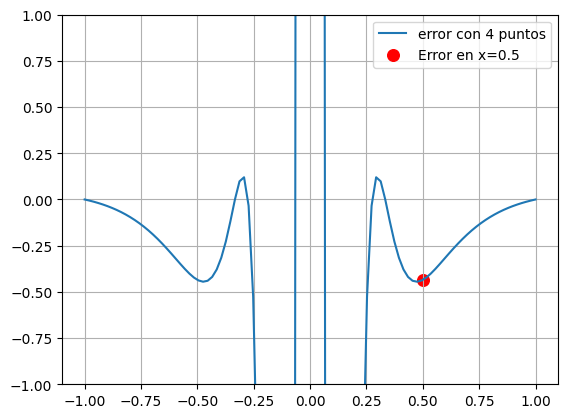

In [86]:
#Ya que vimos la general, fijemonos precisamente en el punto solicitado.

n=[4] #El n solicitado
for j in n:

  pp=puntos(j)  #Guardamos los puntos...

  Coef=1
  for i in pp:
    Coef*=(x-i) #Guardamos los coeficientes

  Ea=(1/sp.factorial(j)) #Guardamos el primer multiplicador.

  df=sp.diff(f1,x,j)      #Guardamos nuestra derivada de grado j+1 (que en indices python, seria nuestro j)

  Error=Ea*df*Coef         #La definición que nos proporcionaron del error...

  Ferror=sp.lambdify(x,Error) #Lo lambdificamos.

  plt.plot(xinter,Ferror(xinter),label=f"error con {j} puntos")
  plt.scatter(0.5,Ferror(0.5),color='r', label='Error en x=0.5',s=70)
  plt.grid()
  plt.legend()
  plt.ylim(-1,1)

In [87]:
print(f"El error con 4 puntos en x=0.5 es igual a {Ferror(0.5)}")

El error con 4 puntos en x=0.5 es igual a -0.434926065494105


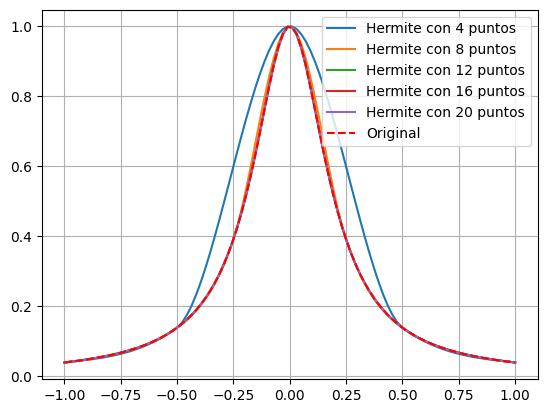

In [89]:
''' Bien! Ya vimos que Lagrange era mas bien... Brinconsito! Ahora bien; que tal se comportará Hermite?'''

#Traemos la mayora de cosas iguales...

f=lambda x: 1/(1+25*(x**2)) #la funcion
n=[4,8,12,16,20]                  #nuestro número de puntos
xinter=np.linspace(-1,1,100)      #Interpol
puntos =lambda n:np.linspace(-1,1,n+1) #Aca meteremos nuestros puntos...
#Pero... esto es hermite! Necesitamos la derivada!!! Usemos sympy

x=sp.symbols('x')
f2=1/(1+25*x**2) #La función!
df2=sp.diff(f2,x) #La derivada de la función...
dydx=sp.lambdify(x,df2)  #y Lo lambdificamos!...


'''Nuevamente, con un practico loop, realizaremos todas nuestras gràficas automatizadas! '''

for i in n:
  p=puntos(i)  #Aca obtenemos los puntos
  dydxp=dydx(p)#Aca obtenemos los puntos en la derivada!

  polihermite=CubicHermiteSpline(p,f(p),dydxp) #Hacemos un hermite con los x, y & dydx!

  plt.plot(xinter,polihermite(xinter),label=f"Hermite con {i} puntos")


plt.plot(xinter,f(xinter),color="r",label="Original",linestyle="--")
plt.legend()
plt.grid()

In [ ]:
'''
WOWOWOW!!!! (Bueno... No es tan sorprendente; ya habiamos visto lo excesivamente eficaz que es hermite!)
Notemos como, a diferencia de Lagrange, a mayor número de puntos, nuestra precisión aumenta MUY significativamente.
El error, es casi Nulo! Es más, a partir de 8 puntos es practicamente irreconocible de la Original.

Asi que sí; Existe una ENORME diferencia. Lo siento Lagrange, Hermite se muestra como el claro vencedor!'''

'\nWOWOWOW!!!! (Bueno... No es tan sorprendente; ya habiamos visto lo excesivamente eficaz que es hermite!)\nNotemos como, a diferencia de Lagrange, a mayor número de puntos, nuestra precisión aumenta MUY significativamente.\nEl error, es casi Nulo! Es más, a partir de 8 puntos es practicamente irreconocible de la Original.\n\nAsi que sí; Existe una ENORME diferencia. Lo siento Lagrange, Hermite se muestra como el claro vencedor!'

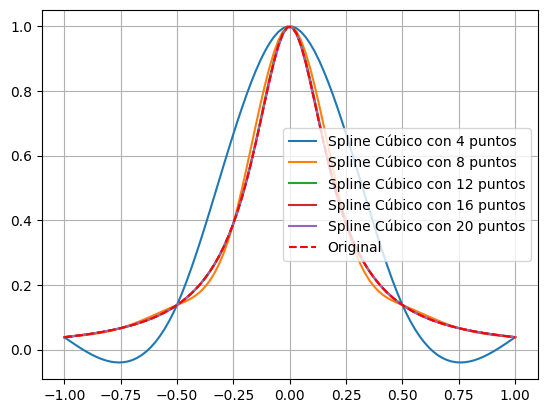

In [90]:
'''Vamos ahora con los cubic Splains'''
#Tomemos otra vez todo prestado...

f=lambda x: 1/(1+25*(x**2))            #la funcion
n=[4,8,12,16,20]                       #nuestro número de puntos
xinter=np.linspace(-1,1,100)           #Interpol
puntos =lambda n:np.linspace(-1,1,n+1) #Los puntos

#No necesitamos derivadas ni cosas extrañas! Netamente nuestros puntos; asi que... vamos a ello!
for i in n:
  p=puntos(i)  #Aca obtenemos los puntos
  policubic=CubicSpline(p,f(p),bc_type='natural') #Definimos nuestro Cubic Spline (No olvidemos el bc_type!!)
  plt.plot(xinter,policubic(xinter),label=f"Spline Cúbico con {i} puntos") #Lo graficamos
plt.plot(xinter,f(xinter),color="r",label="Original",linestyle="--")
plt.legend()
plt.grid()

In [ ]:
'''
Huh! Curioso! Imaginabamos, lógicamente, un comportamiento ligeramente diferente.
En este caso, visualmente podriamos afirmar que Hermite resulto mas preciso en un número menor de puntos.
Sin embargo, es una diferencia muy sutil, muy ligera, por lo cual, si se tuviese que decidir por algun metodo...

Se optaría por Cubic Splines! El proceso de optención de derivadas aveces puede ser mas complejo, y en muchos casos; imposible!
Por lo cual, dada la precisión que se presenta, y la practicidad a la hora de emplear los metodos, se define a Cubic Spline
como el verdadero ganador de la interpolación (Aunque si hay acceso a las derivadas, Hermite gana en precisión!, cuantomenos
en una poca cantidad de puntos, dado que en muchos puntos, ambas, junto con la función original, son practicamente indistingibles)
'''

# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato y realice una interpolación lineal entre los mismos.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

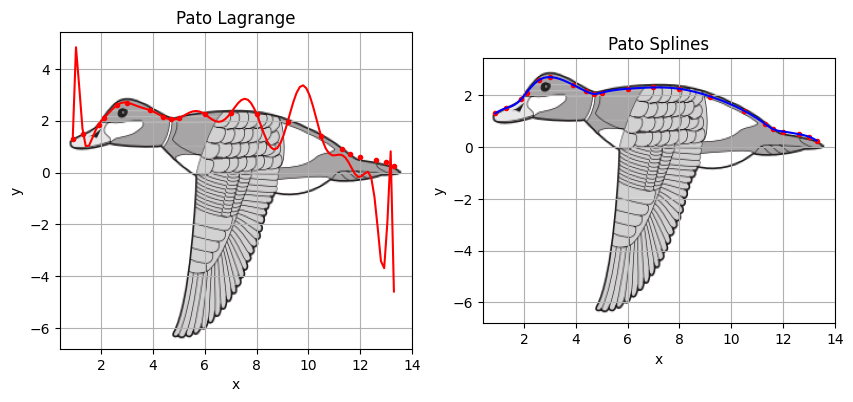

In [ ]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
fig,ax=plt.subplots(1,2,figsize=(10,10))

ax[0].set_title('Pato Lagrange')
ax[0].imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coincidan con x e y
ax[0].plot(xp, yp, '.r')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].grid()

ax[1].set_title('Pato Splines')
ax[1].imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coincidan con x e y
ax[1].plot(xp, yp, '.r')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].grid()

###############################################################################################################
'''Bien! Ya tenemos el lienzo listo, comencemos a trabajar con nuestros polinomios inetrpoladores!!!!'''
#a) Donde haremos nuestra interpolacion
xinterpol=np.linspace(min(xp),max(xp),100)

#b) Interpolemos con lagrange!
polag=lagrange(xp,yp) #Polinomio listo
ax[0].plot(xinterpol,polag(xinterpol),color="r") #Gràfica!

#c) Interpolamos ahora con Splines!
polsplines=CubicSpline(xp,yp) #Polinomio readyyy
ax[1].plot(xinterpol,polsplines(xinterpol),color="b")

plt


In [ ]:
'''
Damas y caballeros, tal como hemos aprendido en toda la actividad, Lagrange presenta caóticas oscilaciones cuando es expuesto
a una muestra considerable de puntos! Por lo cual, vemos como con Splines, obtenemos un trazado limpio, justo por donde debería,
mientras que lagrange, se pone algo caótico! (muy)

¿A que se deben estas oscilaciones?
Bueno; cuando empleamos lagrange, estamos usando polinomios de grado n, mientras que usamos n+1 puntos.
Por lo cual, si tenemos una gran cantidad de puntos, significa que estamos trabajando con un polinomio de un grado muy grande!

En consecuencia, aparece un condición, llamada Fenómeno de RUNGE, quien comienza a oscilar con mayor fuerza en los extremos de los
intervalos. Note que este fenomeno se exacerba directamente cuando empleamos puntos equidistantes (No nuestro caso), sin embargo,
estas oscilaciones de Runge siguen apareciendo (en menor medida), dado el caracter inestable de polinomios de alto grado!
De igual manera, podemos tomar en cuenta los siguientes detalles que tambíen influyen;
-Distribución de los puntos; Lagrange, requiere una posicion estratègica de los puntos, y de pocas cantidades
(por lo mencionado anteriormente), por lo cual, resulta ser un polinomio MUY sensible.

Por lo cual, estos problemas son los que causan nuestra gràfica curiosa del pato Lagrangiano.
'''

'\nDamas y caballeros, tal como hemos aprendido en toda la actividad, Lagrange presenta caóticas oscilaciones cuando es expuesto\na una muestra considerable de puntos! Por lo cual, vemos como con Splines, obtenemos un trazado limpio, justo por donde debería,\nmientras que lagrange, se pone algo caótico! (muy)\n\n¿A que se deben estas oscilaciones?\nBueno; cuando empleamos lagrange, estamos usando polinomios de grado n, mientras que usamos n+1 puntos.\nPor lo cual, si tenemos una gran cantidad de puntos, significa que estamos trabajando con un polinomio de un grado muy grande!\n\nEn consecuencia, aparece un condición, llamada Fenómeno de RUNGE, quien comienza a oscilar con mayor fuerza en los extremos de los\nintervalos. Note que este fenomeno se exacerba directamente cuando empleamos puntos equidistantes (No nuestro caso), sin embargo,\nestas oscilaciones de Runge siguen apareciendo (en menor medida), dado el caracter inestable de polinomios de alto grado!\nDe igual manera, podemos tom

# 5

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$, $(2,4)$, para esto escriba la matriz asociada y encuentre los polinomios $S_0(x)$, $S_1(x)$ y $S_2(x)$. Evalue su respuesta para $x= 1.5$ usando `CubicSpline` de `scipy`.

In [ ]:
xp=[-1,0,1,2]
yp=[5,3,3,4]
#Definamos nuestra función Polinómica
SplineCubico=CubicSpline(xp,yp,bc_type='natural')
print(SplineCubico(1.5))                #Y listo, este es nuestro dato computacional. Comparemoslo con el proceso a mano

3.45


In [77]:
'''
A continuación, se presenta la matriz asociada al los coeficientes del polinomio.
De igual manera se anexan los procedimientos realizados.
'''

matriz=np.array([
    [1,0,0,0,0,1,0,0],
    [0,1,0,1,0,0,1,0],
    [0,0,1,0,1,0,0,1],
    [1,-1,0,0,0,3,0,0],
    [0,0,0,-1,0,3,0,0],
    [0,1,-1,2,0,0,3,0],
    [0,0,0,1,-1,0,3,0],
    [0,0,0,0,1,0,0,3]
    ])
b=np.array([-2,0,1,0,0,0,0,0])


solucion=np.linalg.solve(matriz, b)

b0,b1,b2,c1,c2,d0,d1,d2=solucion #El orden proporcionado
a0=5
a1=3
a2=3                              #Lo que ya sabiamos
c0=0

'''Perfecto! ahora solo queda realizar el polinomio'''
x = sp.symbols('x')
x0, x1, x2 = -1, 0,1


S0 = a0 + b0*(x-x0) + c0*(x-x0)**2 + d0*(x-x0)**3
sp.expand(S0)

S1 = a1 + b1*(x-x1) + c1*(x-x1)**2 + d1*(x-x1)**3
sp.expand(S1)

S2 = a2 + b2*(x-x2) + c2*(x-x2)**2 + d2*(x-x2)**3
sp.expand(S2)

print(f"El polinomio S0(x)={S0}")
print(f"El polinomio S1(x)={S1}")
print(f"El polinomio S2(x)={(S2)}")

El polinomio S0(x)=-2.46666666666667*x + 0.466666666666667*(x + 1)**3 + 2.53333333333333
El polinomio S1(x)=-0.333333333333333*x**3 + 1.4*x**2 - 1.06666666666667*x + 3
El polinomio S2(x)=0.733333333333333*x - 0.133333333333333*(x - 1)**3 + 0.4*(x - 1)**2 + 2.26666666666667


In [78]:
'''
Finalmente, como deseamos encotrar el valor en x=1.5, empleamos el polinomio que tiene este rango, es decir; S2
'''

f_S2=sp.lambdify(x,S2)
f_S2(1.5) #EUREKA! Lo logramos! el polinomio es correcto!!

3.450000000000003

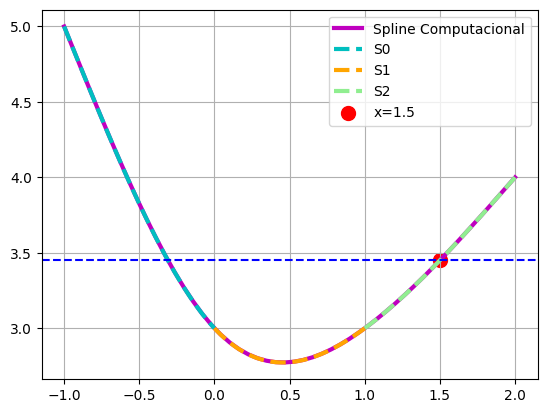

In [79]:
'''Observemos!!!!'''
f_S0=sp.lambdify(x,S0)
f_S1=sp.lambdify(x,S1)

xp=[-1,0,1,2]
yp=[5,3,3,4]

x0 = np.linspace(xp[0], xp[1], 100)
x1 = np.linspace(xp[1], xp[2], 100) #Hacemos los intervalos de nuestros polinomios
x2 = np.linspace(xp[2], xp[3], 100)


plt.plot(np.linspace(min(xp),max(xp)),SplineCubico(np.linspace(min(xp),max(xp))),label='Spline Computacional',color='m',lw=3) #El original
plt.plot(x0,f_S0(x0),label="S0",color='c',ls='--',lw=3) #y graficamos cada uno con su intervalo asociado
plt.plot(x1,f_S1(x1),label="S1",color='orange',ls='--',lw=3)
plt.plot(x2,f_S2(x2),label="S2",color='lightgreen',ls='--',lw=3)
plt.grid()
plt.scatter(1.5,f_S2(1.5),color='r',s=100,label='x=1.5') #Y observemos el punto
plt.axhline(3.45,ls="--",color='b')                      #Justo donde debería coincidir!!!
plt.legend()


In [80]:
'''
¡Hurra! miren que precisión! nuestro polinomio hecho con lapiz y papel, es EXACTAMENTE igual al que la computadora realizó.
todo coincide, el punto, las funciones, y tammbien muy importante, los "empalmes" son suaves (gracias a los criterios de deriavada).
Podemos decir entonces que los calculos fueron todo un exito! Se comparten a continuación los cálculos realizados.
'''

from IPython.display import HTML

url = "https://drive.google.com/file/d/1njnaI76F2_o4_B9uWNjx9ckjhilt_gEs/view?usp=drive_link"

HTML(f'<a href="{url}" target="_blank">Ver imagen en Drive</a>')   #Le dará acceso al link con la imagen de los cálculos.